## Import Packages

**pandas - manipulating the data (eg. read csv file)**

**numpy - apply math functions to arrays**

**matplotlib.pyplot - features to help with plotting figures**

**seaborn - data visualization (eg. heatmap)**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read File

**Use pandas to get where file is saved from computer (may need to include delimiter to separate data into columns). Add headers to label columns of dataframe.**

In [13]:
df = pd.read_csv('Desktop/Data/cleveland_processed.csv', header = None, index_col = False, delimiter = ',')
df.columns = ['Age','Sex','Chest_Pain','RestBP','Chol','FBS', 'RestECG', 'MaxHR', 'Exang', 'Oldpeak', 'Slope_ST_seg', 'Ca', 'Thal', 'Num']

print (df.head())                                                   #1st 5 rows of table with header

    Age  Sex  Chest_Pain  RestBP   Chol  FBS  RestECG  MaxHR  Exang  Oldpeak  \
0  63.0  1.0         1.0   145.0  233.0  1.0      2.0  150.0    0.0      2.3   
1  67.0  1.0         4.0   160.0  286.0  0.0      2.0  108.0    1.0      1.5   
2  67.0  1.0         4.0   120.0  229.0  0.0      2.0  129.0    1.0      2.6   
3  37.0  1.0         3.0   130.0  250.0  0.0      0.0  187.0    0.0      3.5   
4  41.0  0.0         2.0   130.0  204.0  0.0      2.0  172.0    0.0      1.4   

   Slope_ST_seg   Ca Thal  Num  
0           3.0  0.0  6.0    0  
1           2.0  3.0  3.0    2  
2           2.0  2.0  7.0    1  
3           3.0  0.0  3.0    0  
4           1.0  0.0  3.0    0  


## Assess Basic Info

**Find basic statistics and trends of data using .describe()  .info()  .isnull().sum()  .dtypes()  .nunique()  .plot()**

In [4]:
print (df.describe())

              Age         Sex  Chest_Pain      RestBP        Chol         FBS  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       Exang     Oldpeak       Slope         Num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age           303 non-null float64
Sex           303 non-null float64
Chest_Pain    303 non-null float64
RestBP        303 non-null float64
Chol          303 non-null float64
FBS           303 non-null float64
RestECG       303 non-null float64
MaxHR         303 non-null float64
Exang         303 non-null float64
Oldpeak       303 non-null float64
Slope         303 non-null float64
Ca            303 non-null object
Thal          303 non-null object
Num           303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [102]:
print (df.isnull().sum())

Age             0
Sex             0
Chest_Pain      0
RestBP          0
Chol            0
FBS             0
RestECG         0
MaxHR           0
Exang           0
Oldpeak         0
Slope_ST_seg    0
Ca              0
Thal            0
Num             0
dtype: int64


In [7]:
print(df.dtypes)                                            #not working

Age           float64
Sex           float64
Chest_Pain    float64
RestBP        float64
Chol          float64
FBS           float64
RestECG       float64
MaxHR         float64
Exang         float64
Oldpeak       float64
Slope         float64
Ca             object
Thal           object
Num             int64
dtype: object


In [8]:
#unique counts per catogory -- issues with num column?
#print(df.apply(lambda x: x.nunique()))                          #this method works for nunique             
print (df.nunique())                                            #working after adjusting panda, conda, switched to py2

Age            41
Sex             2
Chest_Pain      4
RestBP         50
Chol          152
FBS             2
RestECG         3
MaxHR          91
Exang           2
Oldpeak        40
Slope           3
Ca              5
Thal            4
Num             5
dtype: int64


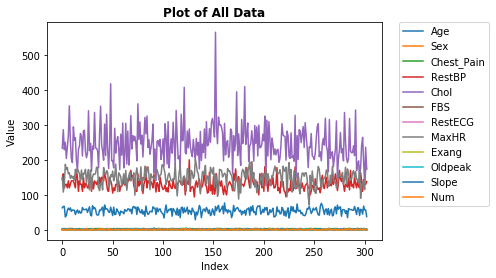

In [10]:
df.plot()
plt.title('Plot of All Data', fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    #place legend box to right of plot
plt.show()


## In-depth Analysis

**Given previous data obtained from basic info, find patterns that can help narrow conclusions made from data.**

- **Plot data on a log scale to identify the scale range of outputs.**

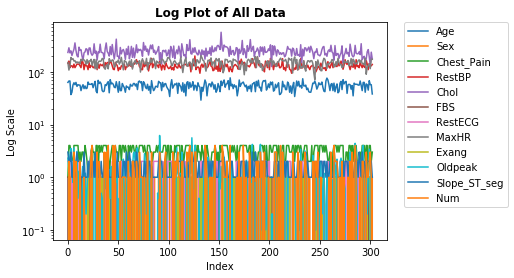

In [104]:
df.plot()
plt.yscale('log')                                                 # makes plot log scale 


plt.title('Log Plot of All Data', fontweight='bold')              # figure features
plt.xlabel('Index')
plt.ylabel('Log Scale')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show()

**Need to have a basic understanding of the basic dataframe. Each column is a 'series', which is a 1D array to you have to use functions specific to series to reach information from a certain column.**

- **Find how many people from each age are part of the study**

In [112]:
each_age = df.Age.value_counts()
print each_age                                          #gives mean values of all categories based on age


58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
41.0    10
64.0    10
67.0     9
63.0     9
42.0     8
43.0     8
53.0     8
65.0     8
55.0     8
61.0     8
45.0     8
46.0     7
66.0     7
50.0     7
48.0     7
47.0     5
49.0     5
39.0     4
68.0     4
35.0     4
70.0     4
69.0     3
40.0     3
71.0     3
34.0     2
37.0     2
38.0     2
74.0     1
29.0     1
77.0     1
76.0     1
Name: Age, dtype: int64


- **Find trends by grouping data according to 'Num' output (0 - no heart disease, 4 - severe heart disease)**

In [129]:
group_by_num= df.groupby("Num")
print group_by_num.Age #gives mean values of all categories based on chest pain
for key, item in group_by_num:
    print(group_by_num.get_group(key), "\n\n")


(      Age  Sex  Chest_Pain  RestBP   Chol  FBS  RestECG  MaxHR  Exang  \
0    63.0  1.0         1.0   145.0  233.0  1.0      2.0  150.0    0.0   
3    37.0  1.0         3.0   130.0  250.0  0.0      0.0  187.0    0.0   
4    41.0  0.0         2.0   130.0  204.0  0.0      2.0  172.0    0.0   
5    56.0  1.0         2.0   120.0  236.0  0.0      0.0  178.0    0.0   
7    57.0  0.0         4.0   120.0  354.0  0.0      0.0  163.0    1.0   
10   57.0  1.0         4.0   140.0  192.0  0.0      0.0  148.0    0.0   
11   56.0  0.0         2.0   140.0  294.0  0.0      2.0  153.0    0.0   
13   44.0  1.0         2.0   120.0  263.0  0.0      0.0  173.0    0.0   
14   52.0  1.0         3.0   172.0  199.0  1.0      0.0  162.0    0.0   
15   57.0  1.0         3.0   150.0  168.0  0.0      0.0  174.0    0.0   
17   54.0  1.0         4.0   140.0  239.0  0.0      0.0  160.0    0.0   
18   48.0  0.0         3.0   130.0  275.0  0.0      0.0  139.0    0.0   
19   49.0  1.0         2.0   130.0  266.0  0.0    

(      Age  Sex  Chest_Pain  RestBP   Chol  FBS  RestECG  MaxHR  Exang  \
24   60.0  1.0         4.0   130.0  206.0  0.0      2.0  132.0    1.0   
40   65.0  0.0         4.0   150.0  225.0  0.0      2.0  114.0    0.0   
45   58.0  1.0         3.0   112.0  230.0  0.0      2.0  165.0    0.0   
47   50.0  1.0         4.0   150.0  243.0  0.0      2.0  128.0    0.0   
121  63.0  0.0         4.0   150.0  407.0  0.0      2.0  154.0    0.0   
136  70.0  1.0         4.0   145.0  174.0  0.0      0.0  125.0    1.0   
146  57.0  1.0         4.0   165.0  289.0  1.0      2.0  124.0    0.0   
153  55.0  1.0         4.0   160.0  289.0  0.0      2.0  145.0    1.0   
161  77.0  1.0         4.0   125.0  304.0  0.0      2.0  162.0    1.0   
174  64.0  1.0         4.0   145.0  212.0  0.0      2.0  132.0    0.0   
211  38.0  1.0         1.0   120.0  231.0  0.0      0.0  182.0    1.0   
264  61.0  1.0         4.0   138.0  166.0  0.0      2.0  125.0    1.0   
285  58.0  1.0         4.0   114.0  318.0  0.0    

- **From .nunique() and data provided able to figure out that predicted heart disease outcome ('Num') has 5 categories (0,1,2,3,4). Group each of the 'Num' outputs and find the means for each category.**

In [117]:
group2 = df.groupby("Num")
print (group2.mean())

           Age       Sex  Chest_Pain      RestBP        Chol       FBS  \
Num                                                                      
0    52.585366  0.560976    2.792683  129.250000  242.640244  0.140244   
1    55.381818  0.836364    3.345455  133.254545  249.109091  0.072727   
2    58.027778  0.805556    3.750000  134.194444  259.277778  0.250000   
3    56.000000  0.800000    3.771429  135.457143  246.457143  0.228571   
4    59.692308  0.846154    3.692308  138.769231  253.384615  0.076923   

      RestECG       MaxHR     Exang   Oldpeak  Slope_ST_seg  
Num                                                          
0    0.835366  158.378049  0.140244  0.586585      1.408537  
1    1.163636  145.927273  0.454545  1.005455      1.636364  
2    0.916667  135.583333  0.611111  1.780556      1.888889  
3    1.285714  132.057143  0.657143  1.962857      1.971429  
4    1.615385  140.615385  0.461538  2.361538      2.076923  


**To access information from a specific 'Num' category (eg. 3), use get_group(3)**

In [132]:
group2 = df.groupby("Num")
print(group2.Age.get_group(4), "\n\n")


(24     60.0
40     65.0
45     58.0
47     50.0
121    63.0
136    70.0
146    57.0
153    55.0
161    77.0
174    64.0
211    38.0
264    61.0
285    58.0
Name: Age, dtype: float64, '\n\n')


## Visualize Data

- **Plot and organize the different outputs of 'Num' relative to Age. 5 output graphs correlating to 'Num' category 0,1,2,3,4**

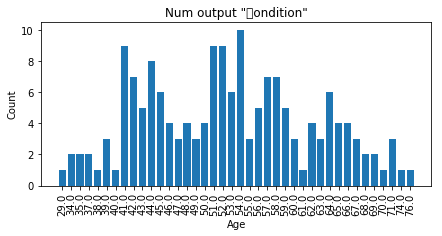

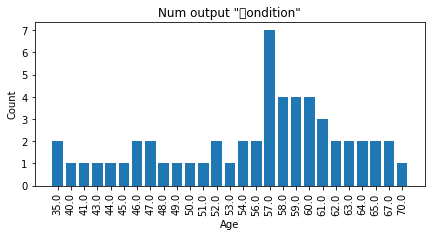

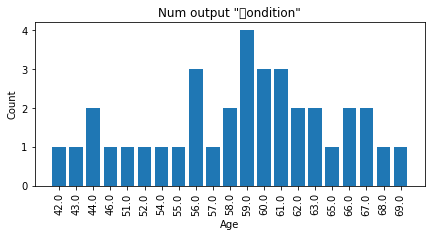

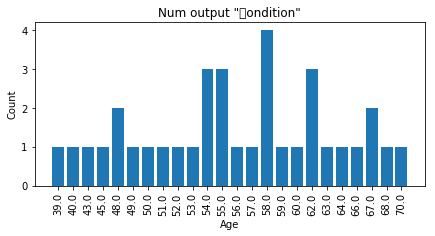

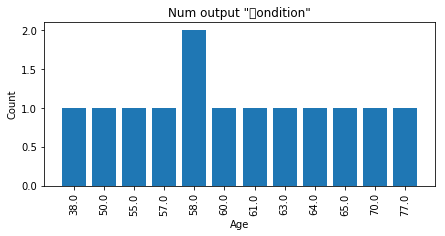

In [119]:
for i in range(5):
    group1=group2.Age.get_group(i)
    group1= group1.value_counts().sort_index()
    age_pos = np.arange(len(group1.index))
    plt.figure(figsize=(7,3))
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title('Num output "%condition"' %i)
    plt.bar(age_pos,group1.values)
    plt.xticks(age_pos,group1.index, rotation =90)
    plt.show()


- **Histogram to assess resting blood pressure distribution**

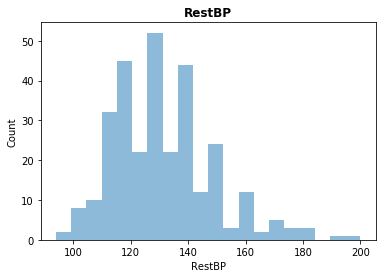

In [133]:
#RestBP distribution of study
x = df['RestBP']
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, alpha=0.5)
plt.title('RestBP', fontweight='bold')
plt.xlabel('RestBP')
plt.ylabel('Count')
plt.show()

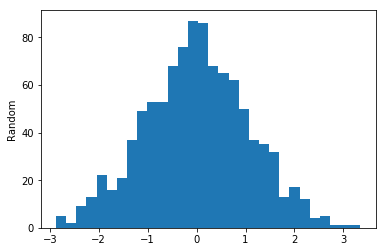

In [138]:
#normalize distribution -- random
age_hist = np.random.normal(size = 1000)
plt.hist(age_hist, bins=30)
plt.ylabel('Random')
plt.show()

- **Creating scatterplot of maximum heart rate vs. rest blood pressure**

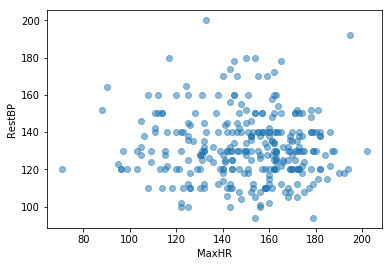

In [97]:
#making markers that vary in size and color; multi-dimensional plot

#scatterplot
x = df['MaxHR']
y = df['RestBP']
#plt.title('FBS vs. angina', fontweight='bold')
plt.xlabel('MaxHR')
plt.ylabel('RestBP')
#plt.errorbar(x,y,linestyle= 'None', marker='s')
plt.scatter(x, y, alpha=0.5)


- **Create heatmap using .corr() to visualize correlation of all categories. Diagonal should all be 1.0 because comparing against itself.**

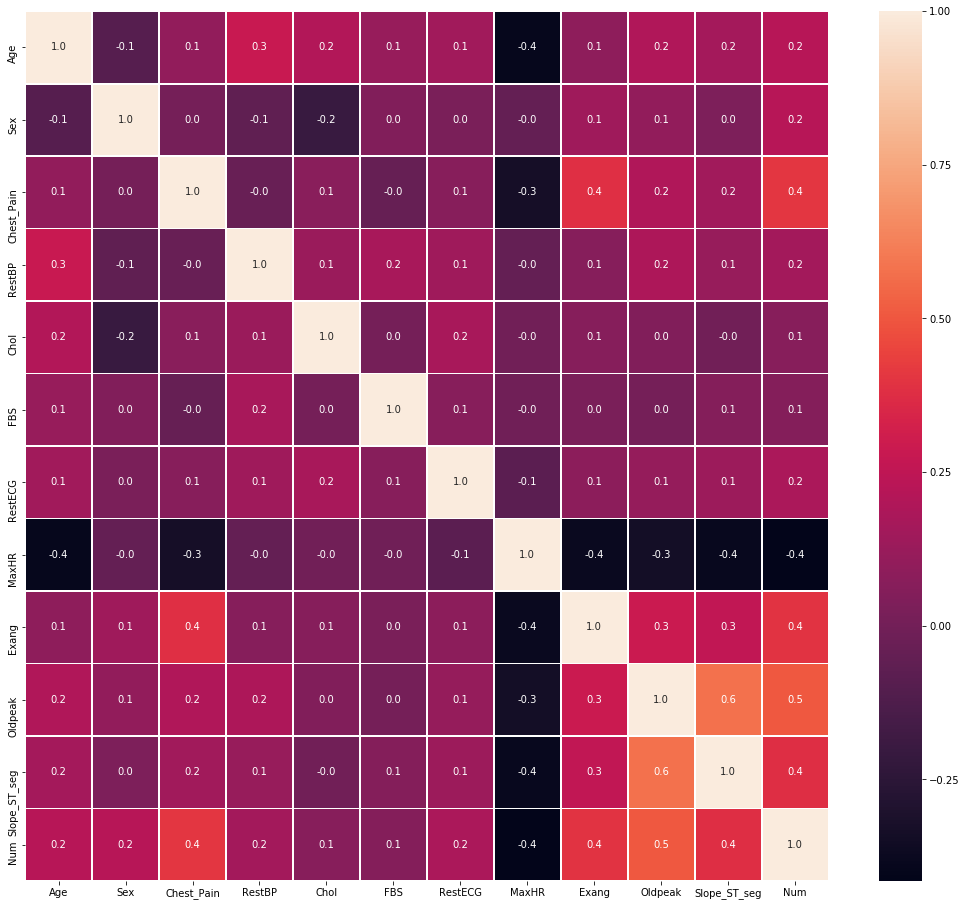

In [81]:
#heatmap
f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.show()